In [1]:
# Importing naumpy and pandas libraries to read the data

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Read the given CSV file, and view some sample records
df = pd.read_csv("../datasets/c3o-experiments/sort.csv")
df

,instance_count,machine_type,slots,memory,data_size_MB,line_length,lines,gross_runtime
0,2,c4.2xlarge,16,30000,9530,1000,10000000,340
1,2,c4.2xlarge,16,30000,9530,1000,10000000,348
2,2,c4.2xlarge,16,30000,9530,1000,10000000,352
3,2,c4.2xlarge,16,30000,9530,1000,10000000,352
4,2,c4.2xlarge,16,30000,9530,1000,10000000,360
...,...,...,...,...,...,...,...,...
625,12,r4.2xlarge,96,732000,19260,100,200000000,146
626,12,r4.2xlarge,96,732000,19260,100,200000000,146
627,12,r4.2xlarge,96,732000,19260,100,200000000,146
628,12,r4.2xlarge,96,732000,19260,100,200000000,146


In [2]:
df = df.drop(["machine_type" ], axis=1)

dataset = df.values

X = dataset[:,0:7]

Y = dataset[:,-1]

In [3]:
from sklearn import preprocessing
x_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

X = x_scaler.fit_transform(X_train)
Y= y_scaler.fit_transform(Y_train.reshape(-1, 1) )

print(X,Y)



[[-0.82315714 -0.82315714  0.00863498 ... -0.3968379   0.47986831
  -0.51161454]
 [-0.82315714 -0.82315714  0.00863498 ... -0.3968379   0.13688302
  -0.63043941]
 [ 1.50757994  1.50757994  2.58962998 ... -0.3968379   0.47986831
  -0.74926428]
 ...
 [ 0.3422114   0.3422114   1.29913248 ... -0.3968379   1.1658389
  -0.55122283]
 [-0.82315714 -0.82315714  0.00863498 ... -0.3968379   0.47986831
  -0.53802007]
 [-0.24047287 -0.24047287  0.65388373 ... -0.3968379   1.1658389
  -0.36638415]] [[-5.11614545e-01]
 [-6.30439410e-01]
 [-7.49264276e-01]
 [-3.39978628e-01]
 [-7.88872565e-01]
 [-4.45600731e-01]
 [-7.36061513e-01]
 [ 1.08915309e-01]
 [-3.39978628e-01]
 [ 2.01334649e-01]
 [ 9.27486605e-01]
 [-7.36061513e-01]
 [-4.32397968e-01]
 [ 3.59767803e-01]
 [-7.09655987e-01]
 [-2.60762051e-01]
 [ 3.93771653e+00]
 [-3.53181391e-01]
 [-3.63150824e-02]
 [ 5.31403720e-01]
 [-5.51222833e-01]
 [-3.39978628e-01]
 [-5.64425596e-01]
 [ 1.07271700e+00]
 [ 4.29014947e-02]
 [ 8.25097832e-02]
 [-2.21153762e-0

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D

In [23]:
model = Sequential([
    Dense(32, input_shape=(7,)),
    Dense(1)
])

In [24]:
model.compile(optimizer='SGD',
              loss='mae',
              metrics=['accuracy'])

In [25]:
hist = model.fit(X, Y,
          batch_size=32, epochs=100)

Epoch 1/100
14/14 [==============================] - 10s 33ms/step - loss: 0.4484 - accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 1s 44ms/step - loss: 0.1686 - accuracy: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 1s 40ms/step - loss: 0.1140 - accuracy: 0.0000e+00
Epoch 4/100
14/14 [==============================] - 0s 30ms/step - loss: 0.0620 - accuracy: 0.0000e+00
Epoch 5/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0350 - accuracy: 0.0000e+00
Epoch 6/100
14/14 [==============================] - 1s 51ms/step - loss: 0.0361 - accuracy: 0.0000e+00
Epoch 7/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 8/100
14/14 [==============================] - 1s 43ms/step - loss: 0.0350 - accuracy: 0.0000e+00
Epoch 9/100
14/14 [==============================] - 1s 41ms/step - loss: 0.0341 - accuracy: 0.0000e+00
Epoch 10/100
14/14 [==============================] - 0s 36ms/s

In [26]:
pred = model.predict(x_scaler.transform(X_test))
scaled_y =y_scaler.inverse_transform(pred) 


6/6 [==============================] - 3s 45ms/step


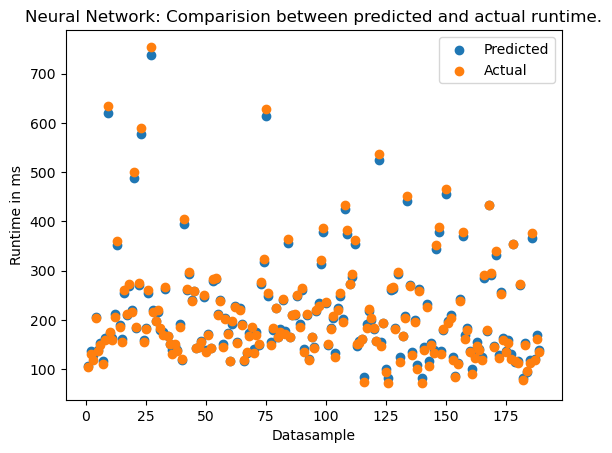

In [27]:
import matplotlib.pyplot as plt

def plot_scatter(x_values, y_values, y_values_2):
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Set the x-values as a range from 1 to the length of the list
    x_values = list(range(1, len(y_values) + 1))

    # Plot the scatter plot
    ax.scatter(x_values, y_values, label='Predicted')
    ax.scatter(x_values, y_values_2, label='Actual')


    # Set labels for x and y axes
    ax.set_xlabel('Datasample')
    ax.set_ylabel('Runtime in ms')
    ax.legend()
    # Set a title for the plot
    ax.set_title('Neural Network: Comparision between predicted and actual runtime.')

    # Show the plot
    plt.show()


plot_scatter(scaled_y, scaled_y, Y_test)